**M7 - PARTE 2**

**1 - Carregue a base e garanta que a base está como deveria.**

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Carregar a base de dados já processada
base = pd.read_csv('/content/base_processada.csv')

In [ ]:
# Verificar valores ausentes
print("Total de valores ausentes:", base.isnull().sum().sum())

Total de valores ausentes: 0


In [ ]:
# Conferir se a variável resposta está presente
print(" Colunas disponíveis:", list(base.columns))

 Colunas disponíveis: ['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated', 'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_House / apartment', 'NAME_HOUSING_TYPE_Municipal apartment', 'NAME_HOUSING_TYPE_Office apartment', 'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents', 'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Core staff', 'OCCUPATION_TYPE_Drivers', 'OCCUPATION_TYPE_HR staff', 

In [ ]:
# Separar variável resposta (y) e variáveis explicativas (X)
X = base.drop(columns=['mau_pagador'])
y = base['mau_pagador']

In [ ]:
# Separar a base em treino e validação (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape de X_train:", X_train.shape)
print("Shape de X_test:", X_test.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)

Shape de X_train: (306989, 47)
Shape de X_test: (131568, 47)
Shape de y_train: (306989,)
Shape de y_test: (131568,)


In [ ]:
# Dividir em treino (70%) e teste (30%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=123)

print(f" Base dividida com sucesso:")
print(f"Treinamento: {X_treino.shape} | Teste: {X_teste.shape}")

 Base dividida com sucesso:
Treinamento: (306989, 47) | Teste: (131568, 47)


 **2 - Vamos para o modelo:**

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
# Criar o modelo de árvore de decisão
arvore = DecisionTreeClassifier(random_state=123)

In [ ]:
# Treinar o modelo
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=123)

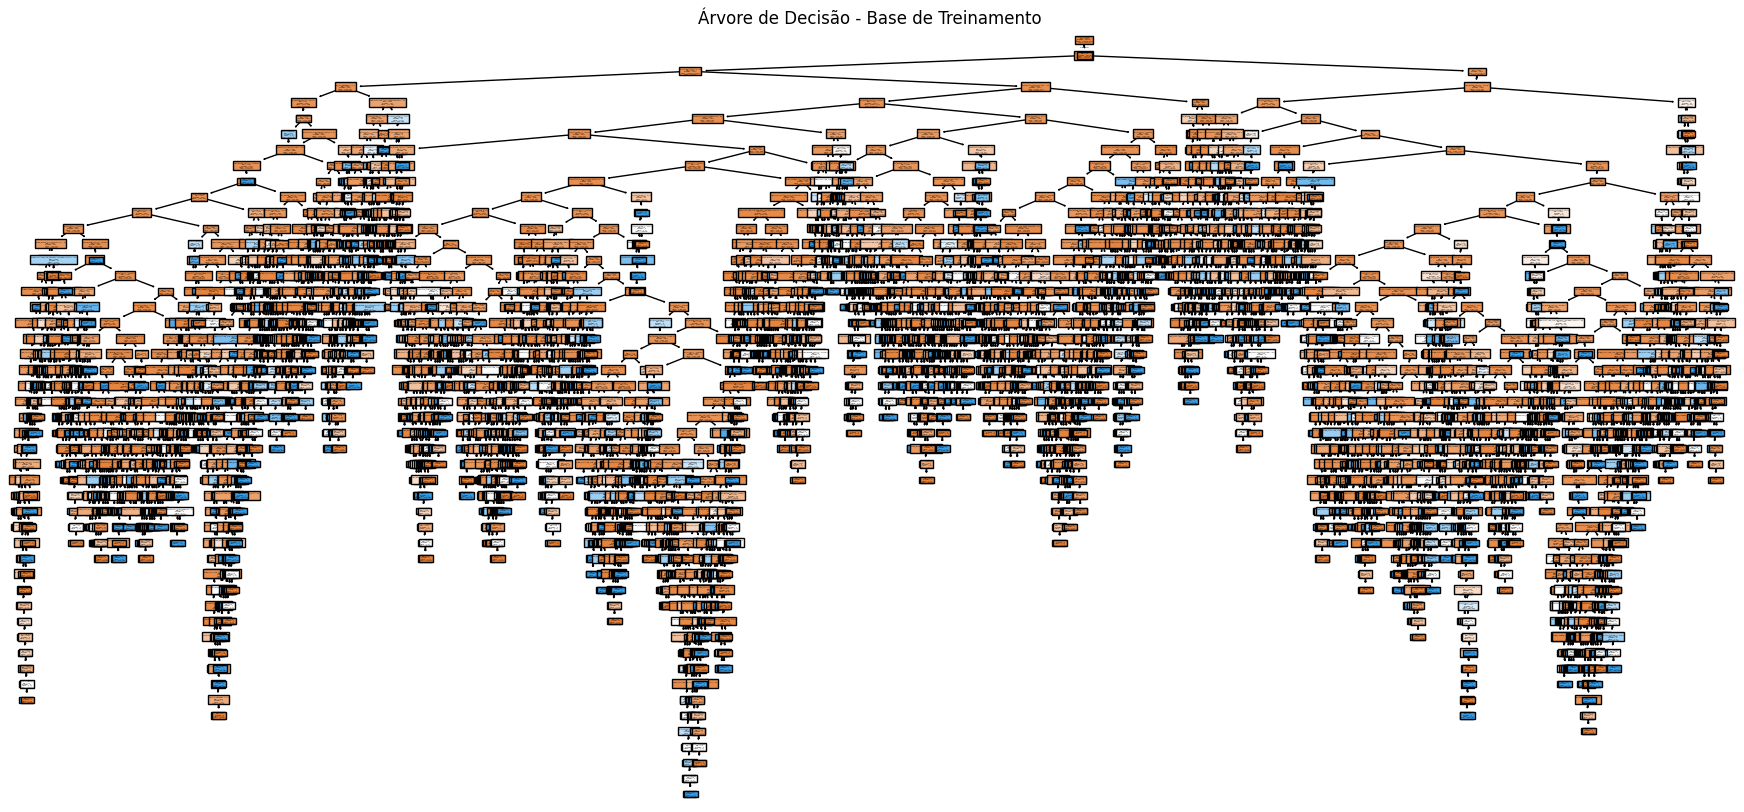

In [34]:
# Visualizar a árvore (aumentar tamanho da figura para melhor leitura)
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'sans-serif' # Tentativa de usar uma fonte mais comum
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Especifique a fonte Dejavu Sans

plt.figure(figsize=(22,10))
plot_tree(arvore, filled=True, feature_names=X.columns, class_names=['aprovado', 'reprovado'])
plt.title("Árvore de Decisão - Base de Treinamento")
plt.show()

In [ ]:
# Fazer previsões na base de treinamento
y_prev_treino = arvore.predict(X_treino)

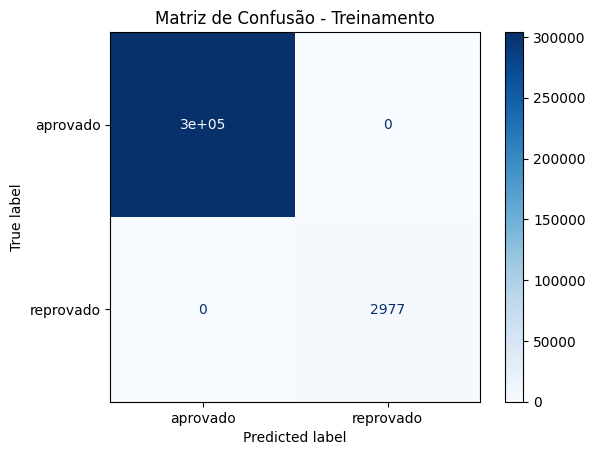

In [ ]:
# Criar a matriz de confusão da base de treinamento
matriz_treino = confusion_matrix(y_treino, y_prev_treino)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_treino, display_labels=['aprovado', 'reprovado'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Treinamento")
plt.show()

In [ ]:
# Calcular acurácia no treinamento
acuracia_treino = accuracy_score(y_treino, y_prev_treino)
print(f"Acurácia na base de treinamento: {acuracia_treino:.4f}")

Acurácia na base de treinamento: 1.0000


**3 - Vamos avaliar o modelo na base de testes**

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
# Fazer previsões na base de teste
y_prev_teste = arvore.predict(X_teste)

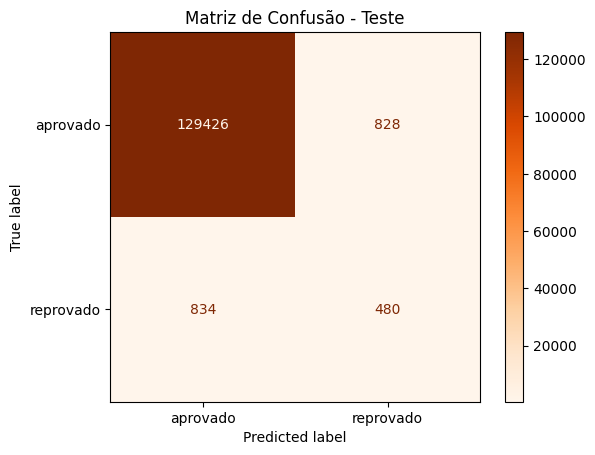

In [ ]:
# Matriz de confusão para base de teste
matriz_teste = confusion_matrix(y_teste, y_prev_teste)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_teste, display_labels=['aprovado', 'reprovado'])
disp.plot(cmap='Oranges')
plt.title("Matriz de Confusão - Teste")
plt.show()

In [ ]:
# Calcular acurácia na base de teste
acuracia_teste = accuracy_score(y_teste, y_prev_teste)
print(f"Acurácia na base de teste: {acuracia_teste:.4f}")
print(f"Diferença entre treino e teste: {acuracia_treino - acuracia_teste:.4f}")

Acurácia na base de teste: 0.9874
Diferença entre treino e teste: 0.0126


In [ ]:
# Criar modelo com restrições para evitar overfitting
arvore_podada = DecisionTreeClassifier(
    random_state=123,
    min_samples_leaf=5,   # mínimo de 5 amostras por folha
    max_depth=10          # profundidade máxima da árvore
)

In [ ]:
# Treinar o modelo podado
arvore_podada.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [ ]:
# Fazer previsões na base de teste
y_prev_podada = arvore_podada.predict(X_teste)

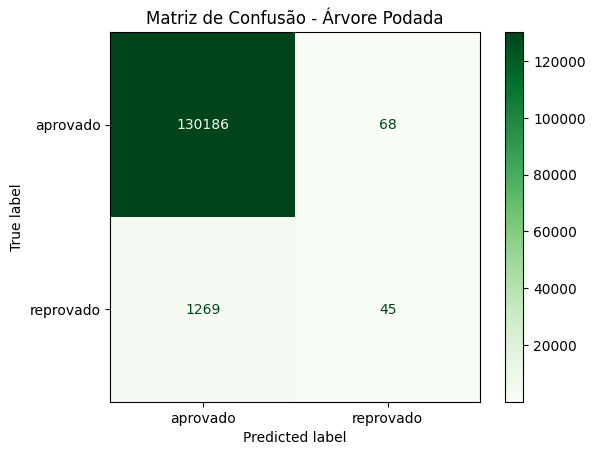

In [ ]:
# Matriz de confusão da árvore podada
matriz_podada = confusion_matrix(y_teste, y_prev_podada)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_podada, display_labels=['aprovado', 'reprovado'])
disp.plot(cmap='Greens')
plt.title("Matriz de Confusão - Árvore Podada")
plt.show()

In [ ]:
# Calcular acurácia da árvore podada
acuracia_podada = accuracy_score(y_teste, y_prev_podada)
print(f"Acurácia da árvore podada: {acuracia_podada:.4f}")

Acurácia da árvore podada: 0.9898


In [ ]:
# Proporção de clientes classificados como 'mau pagador'
proporcao_mau = np.mean(y_prev_podada)
print(f"Proporção de classificados como 'mau pagador': {proporcao_mau*100:.2f}%")

Proporção de classificados como 'mau pagador': 0.09%


In [ ]:
# Criar um vetor classificando todos como bons (0)
y_todos_bons = np.zeros_like(y_teste)

In [ ]:
# Calcular a acurácia neste cenário
acuracia_todos_bons = accuracy_score(y_teste, y_todos_bons)
print(f"Acurácia se todos fossem classificados como 'bons pagadores': {acuracia_todos_bons:.4f}")

Acurácia se todos fossem classificados como 'bons pagadores': 0.9900


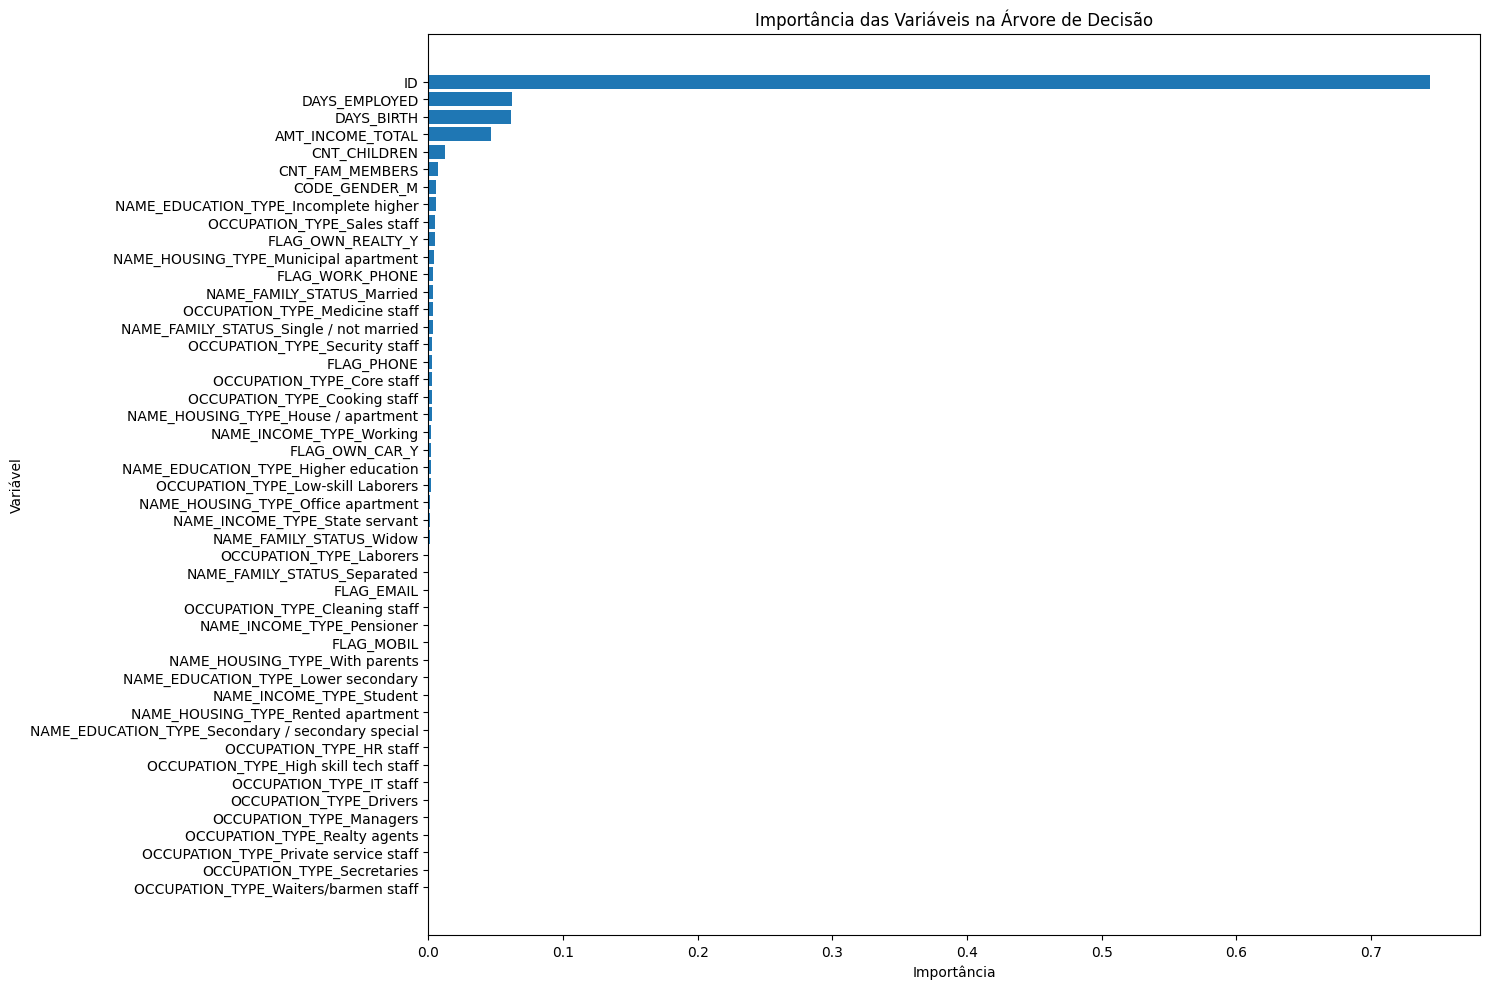

,Variável,Importância
0,ID,0.743640
4,DAYS_EMPLOYED,0.061911
3,DAYS_BIRTH,0.061667
2,AMT_INCOME_TOTAL,0.046697
1,CNT_CHILDREN,0.012137
9,CNT_FAM_MEMBERS,0.007347
10,CODE_GENDER_M,0.005577
18,NAME_EDUCATION_TYPE_Incomplete higher,0.005414
43,OCCUPATION_TYPE_Sales staff,0.004928
12,FLAG_OWN_REALTY_Y,0.004853


from matplotlib import pyplot as plt
_df_5['Importância'].plot(kind='hist', bins=20, title='Importância')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Importância'].plot(kind='line', figsize=(8, 4), title='Importância')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Importância das variáveis
importancias = pd.DataFrame({
    'Variável': X.columns,
    'Importância': arvore_podada.feature_importances_
}).sort_values(by='Importância', ascending=False)

plt.figure(figsize=(15, 10)) # Aumentando o tamanho da figura novamente
plt.barh(importancias['Variável'], importancias['Importância'])
plt.gca().invert_yaxis()
plt.title("Importância das Variáveis na Árvore de Decisão")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

display(importancias.head(10))